# Support Vector Machines

1. Ưu điểm:
- Hiệu quả trong không gian nhiều chiều, có nền tảng lý thuyết tốt
- Hiệu quả về bộ nhớ (do sử dụng support vectors)
- Đa năng: các Kernel func có thể đc dùng như các decision func

2. Nhược điểm:
- Nếu số lượng đặc trưng(features) lớn hơn nhiều so với mẫu(samples), thì việc tránh overfitting trong việc chọn hàm Kernel và chính quy hóa(regularization) là rất quan trọng. 
- SVM ko trực tiếp cung cấp các ước tính xác suất

3. Độ phức tạp: 
- SVM là 1 công cụ mạnh, nhưng yêu cầu tính toán và lưu trữ tăng lên nhanh chóng khi tăng số chiều của tập training.
- Cốt lõi của SVM là quadratic programming (QP), vì vậy độ phức tạp sẽ nằm giữa
$O(n_{features} . n^2_{samples})$ và $O(n_{features} . n^3_{samples})$

4. Tips khi sử dụng trong lập trình:
- Kernel caches size: đối với SVC, SVR, NuSVC, NuSVR, kích thước cái này có ảnh hưởng lớn tới thời gian chạy. Vì vậy có thể cài đặt cache_size cao lên, nếu máy có đủ RAM.
- Cài đặt C: nếu có nhiều nhiễu trong quan sát, nên giảm C. LinearSVC và LinearSVR ít nhạy cảm với C khi dữ liệu nó lớn, nên ko cần C lớn, vì C lớn sẽ mất nhiều thời gian chạy hơn.
- Các thuật toán của SVM ko bất biến về tỷ lệ, vì vậy nên chia tỷ lệ cho data.
- Trong SVC, nếu data bị mất cân bằng(như tỷ lệ số dương/ số âm lớn), thì ta đặt class_weight = 'balanced', và thử các penalty parameters C khác.

5. Parameters:
Việc lựa chọn tham số rất quan trọng đến hiệu suất của SVM
- Tham số C: chung cho mọi SVM kernels. C thấp làm cho decision boundary/surface trở nên trơn, tỏng khi đó C cao nhằm phân loại chính xác tất cả mẫu huấn luyện.
- Tham số Gamma (là tham số của RBF kernel): = $\dfrac{1}{2\delta}$

# I. Classification: 
Có 3 phương pháp SVC (Support Vector Classification), NuSVC, LinearSVC. SVC và NuSVC khá giống nhau, khác chút về tham số và các CT toán học. Còn LinearSVC thì có thể có kết quả và điểm phân loại khác với 2 cách trên.

- Dưới đây ta trình bày 1 bài phân tách bằng siêu phẳng cơ bản: lưu ý hàm decision_func trả về điểm (classification score) của mỗi lớp cho mỗi mẫu 

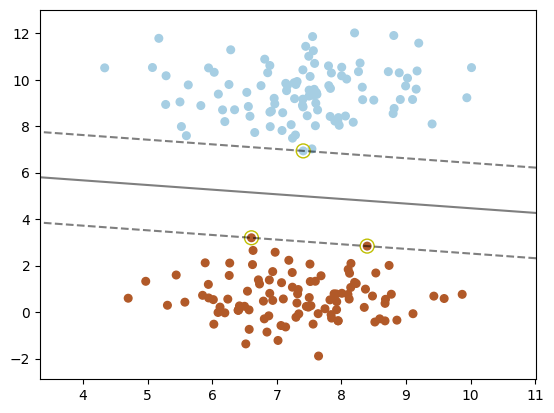

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs

n = int(input())
data_x, data_y = make_blobs(n_samples=200,centers= 2, random_state=n)

s = svm.SVC(kernel='linear', C=100)
s.fit(data_x, data_y)
# data_y have value {0, 1}
plt.scatter(data_x[:,0], data_x[:, 1], c = data_y,s = 30, cmap = plt.cm.Paired)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(s, data_x, plot_method="contour", levels = [-1, 0, 1], linestyles = ["--", "-", "--"], ax= ax, colors = 'k', alpha = 0.5)

ax.scatter(s.support_vectors_[:, 0], s.support_vectors_[:, 1], edgecolors='y', s = 100, facecolors = "none")
plt.show()

- Ta trình bày bài phân loại nhị phân bằng non-linear SVC sử dụng hàm Kernel là RBF

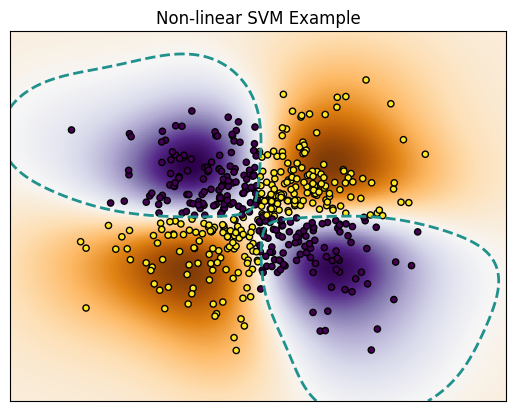

In [2]:
from sklearn import svm 
import matplotlib.pyplot as plt 
import numpy as np 

xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))      # Trả về 2 mảng tất cả tọa độ của x và mảng tọa độ của y

data_x = np.random.randn(500, 2)      
data_y = np.logical_xor(data_x[:, 0] > 0, data_x[:, 1] < 0)                 # Return True if a != b
s = svm.NuSVC(kernel="rbf", gamma="auto")
s.fit(data_x, data_y)

z = s.decision_function(np.c_[xx.flatten(), yy.flatten()])                            # np.c_ dùng để hợp nhất 2 mảng thành mảng nx2
z = z.reshape(len(xx), len(yy))

plt.imshow(z, cmap=plt.cm.PuOr_r, aspect='auto', interpolation="nearest", origin='lower',  extent=(xx.min(), xx.max(), yy.min(), yy.max()))                                    # Biểu diễn data dưới dạng ảnh

plt.contour(xx, yy, z, levels = 0, linestyles = "dashed", linewidths = 2)                                   # Vẽ đường đồng mức, levels: số đường mức - 1
plt.scatter(data_x[:, 0], data_x[:, 1], c =data_y, edgecolors='k', s = 20)
plt.title("Non-linear SVM Example")
plt.xticks(())
plt.yticks(())
plt.show()

# II. Multi-class classification
- SVC và NuSVC sử dụng phương pháp "one vs one", tức có tổng $C^k_n$ bộ phân loại và mỗi bộ phân loại train data từ 2 lớp
- Linear SVC sử dụng phương pháp "one vs the rest", như đã trình bài ở bài Linear_Model

# III. Unbalanced problems
Trong nhiều bài toán, ta thấy một số mẫu hoặc lớp nhất định, có tầm quan trọng hơn phần còn lại => có thể sử dụng class_weight, sample_weight.
- SVC (ko có NuSVC) có tham số class_weight trong fit method. 
- Các phương pháp đều có tham số sample_weight, cả 2 đều có dạng từ điển {class_label: value}, trong đó C = C*value (C là tham số của class_label)

Dưới đây ta trình bày ví dụ về tìm siêu phẳng phân tách trong 2 TH: giữ nguyên và chỉnh trọng số.

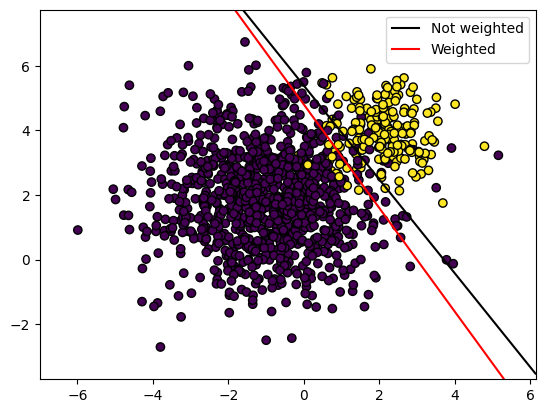

In [3]:
import numpy as np 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs
from sklearn import svm 
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines

centers = [[-1, 2], [2, 4]]
data_x, data_y = make_blobs(n_samples=[1000, 200], centers=centers, random_state=2, cluster_std=[1.5, 0.8])                     # cluster_std: độ lệch chuẩn của mỗi cụm (1.5 cho cụm 1000)

s_not_weght = svm.SVC(kernel="linear", C=10)
s_not_weght.fit(data_x, data_y)

s_weight = svm.SVC(kernel="linear", C = 10, class_weight={0:4, 1:12})
s_weight.fit(data_x, data_y)

plt.scatter(data_x[:, 0], data_x[:, 1], c = data_y, edgecolors='k')

ax = plt.gca()
case_1 = DecisionBoundaryDisplay.from_estimator(s_not_weght, data_x, plot_method="contour", levels = 0, ax=ax, colors = 'k')            # Cần gọi plot_method
case_2 = DecisionBoundaryDisplay.from_estimator(s_weight, data_x ,plot_method="contour", levels = 0, ax = ax, colors = 'r')

plt.legend(
    [
        mlines.Line2D([], [], color='k'),
        mlines.Line2D([], [], color = 'r')
    ],
    ["Not weighted", "Weighted"],
    loc = "upper right"
)
plt.show()

# IV. Regression
Có 3 phương pháp là: SVR, NuSVR và LinearSVR. LinearSVR có khả năng triển khai nhanh hơn SVR, nhưng chỉ cho linear kernel. Trong khi đó NuSVR có công thức khác so với SVR và LinearSVR

Dưới đây là sơ đồ thể hiện 3 phương pháp trong 1 bài toán hồi quy đơn giản

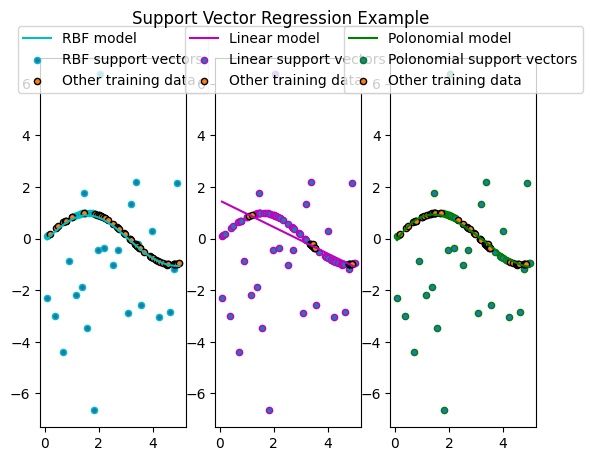

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR

data_x = np.sort(5*np.random.rand(100, 1), axis = 0)
data_y = np.sin(data_x).ravel()
data_y[::4] = 3*np.random.randn(25)                       # Tạo lỗi cho dữ liệu

svr_rbf = SVR(kernel="rbf", C=10, gamma=0.1, epsilon=0.1)
svr_linear = SVR(kernel="linear", C= 10, gamma=0.1)
svr_poly = SVR(kernel="poly", C=10, gamma=0.1, coef0=1)

svrs = [svr_rbf, svr_linear, svr_poly]
colors = ["c", "m", "g"]
kernel_func = ["RBF", "Linear", "Polonomial"]
fig, axes = plt.subplots(1, 3)

for i, svr in enumerate(svrs):
    axes[i].plot(
        data_x, 
        svr.fit(data_x, data_y).predict(data_x),
        color = colors[i],
        label = f"{kernel_func[i]} model"
    )
    
    axes[i].scatter(
        data_x[svr.support_],               # Trả về chỉ số của điểm nào là sv
        data_y[svr.support_],
        edgecolors = colors[i],
        s = 20,
        label = f"{kernel_func[i]} support vectors"
    )

    axes[i].scatter(
        data_x[np.setdiff1d(np.arange(len(data_x)), svr.support_)],
        data_y[np.setdiff1d(np.arange(len(data_y)), svr.support_)],
        edgecolors = "k",
        s = 20,
        label = "Other training data"
    )
    axes[i].legend(
        loc = "upper center",
        bbox_to_anchor=(0.5, 1.105),
        fancybox = True 
    )
plt.suptitle("Support Vector Regression Example")
plt.show()

- Ta cũng có thể tự tạo hàm kernel của riêng mình và train. Ở đây ta sẽ tạo my_kernel = $x^TAy$

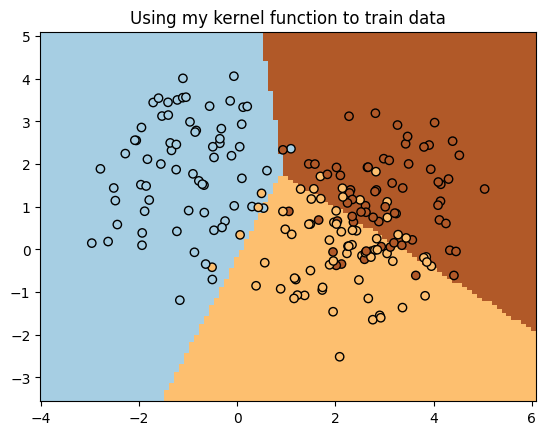

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay


centers = [[-1, 2], [2, 0], [3, 1]]
data_x, data_y = make_blobs(n_samples=200, centers = centers, random_state=20)


def my_kernel(data_x, data_y):                      # Hàm x^TAy, tuy nhiên mặc dù ko cùng chiều nhưng vẫn chạy được !?
    A = np.array([[2, 1], [1, 3]])
    return np.dot(np.dot(data_x, A), data_y.T)

s = svm.SVC(kernel=my_kernel)
s.fit(data_x, data_y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    s,
    data_x,
    ax = ax, 
    response_method='predict',
    plot_method='pcolormesh',
    cmap = plt.cm.Paired

)

plt.scatter(data_x[:,0], data_x[:, 1], c = data_y, edgecolors='k', cmap=plt.cm.Paired)
plt.title("Using my kernel function to train data")
plt.show()